# Plots & Graphs

Time to unleash the right side of your brain!  Truthfuly, we should have been working with plots for the last few sections way more extensively than we have.  Instead of introducing too many topics at once, we intentionally paused delving into the the visual exploration side of things so we could focus on one thing at a time.  Now that the analytical side of EDA is behind us, it's time to see how adding some visual creativity to your arsenal will pay huge dividends!

```{figure} ../images/right_brain.png
---
width: 600px
name: right-brain-fig
---
```

Plots and graphs will come into play at multiple stages during the course of your project.  First, they'll aid in your EDA journey with the basic understanding of what you're working with, investigating raw features, and helping to identify if there are any potential issues in the data.  Then once you start moving into feature engineering and transformations you'll want to begin visualing the changes and relational effects between your variables.  After that, when you start getting into building models and iterating through versions, you'll need some way to visualize the progress, tuning, and performance of your candidate models.

Up to this point all of the visuals and graphs you've been building are purely for your benefit.  They can be as simple and utilitarian, or as pretty as you want them to be.  The main focus during the proof of concept stages is to find a viable solution that works, so they only need to help you in that pursuit.  The next layer of visualizations you'll need to concern yourself with are external facing.

During the course of a project you'll have multiple and distinct groups of people you'll need to communicate with, all at different levels of detail.  You'll have data science peers that will need to understand the low-level and technical aspects of your program.  You'll have business sponsors who just want to understand that you solved their problem in some way, and don't need all of the gory math and technical details.  And finally, you'll have executive leadership teams who want _very_ simple and high-level details of your success story so they can understand the value you're bringing to the organization.   As you'll come to find out, visual graphics are often worth a thousand words, and can go a long way in selling your story to all of these different stakeholders.

<h3>Plotting In Python</h3>

Before going too far, we need to lay out some of the most popular library options for plotting in Python.  There are many other popular ones you could choose from, but what follows is a pretty typical starting point for your foundational learning.  Expand from here and find out what works for you in practice.

Take a look at the documentation and example galleries from the following to get a taste of what's possible.

__<a href="https://matplotlib.org/">Matplotlib</a>__ is the oldest and still the most popular plotting extension.  No question it works, and you'll find lots of online support if you need it.  In my opinion, it's a bit verbose to use as your top level administration though.  There are several packages offering better quality graphics with less code (interestingly enough, probably built on top of matplotlib...).  So the only time I'll use matplotlib these days is if it's something _extremely_ simple and I just need one or two lines of code to make it happen.  Other than that, it'll be one of these others that leverage matplotlib underneath the hood.  Your mileage may vary of course.

__<a href="https://seaborn.pydata.org/tutorial.html">Seaborn</a>__ is a library package built on top of matplotlib that addresses most of my gripes with matplotlib.  It's much more concise coding with better quality results.  I will absolutely use seaborn in my workflow depending on the graph I need, but it's not my primary library.  I favor what's known as the "Grammar of Graphics" {cite}`Wilkinson_2005`, which is an entirely novel approach to plotting that we'll get to when we discuss plotnine below.  Having said of all that, seaborn is currently being updated as we speak from it's core library to a grammar of graphics interface known as <a href="https://seaborn.pydata.org/tutorial/objects_interface.html">seaborn.objects</a>.  I guess the word is out that it's a superior methodology.  I won't cover the new seaborn.objects interface here, because frankly, I haven't taken the time to learn it yet because my needs are met elsewhere.  I have a sneaking suspicion that this library is more actively being developed so I will likely check it out again after it's fully built out.

__<a href="https://pandas.pydata.org/">Pandas</a>__ should sound familiar to you if you've been beefing up your coding skills.  The extremely popular pandas library has plotting functionality that chains and works extremely well in any pandas workflow.  I will often use pandas plotting when I'm visualizing a single series or something very simple.  If it's more than that, I'll tend to default to my package of choice up next.

__<a href="https://plotnine.readthedocs.io/en/v0.12.4/#">Plotnine</a>__ is the current standard for implementing the grammar of graphics for Python.  It's modeled after the go-to R programming plotting library by Hadley Wickham, ggplot2 {cite}`ggplot2_2016`.  Since I came to Python from R, this was a no-brainer for me.  The value Hadley and team introduced and gave to the analytics community by incorporating this standardized interface cannot be overstated.  It's a super logical way to build up a plot layer by layer with exactly what you need.  It won't always be the most concise code, especially for simple plots, but once you learn the syntax you won't really mind.  Fair enough to say I'm a ggplot fan, and by extension, plotnine.  The only downsides I've run into with the plotnine implementation of the logic, is that it's missing a few of the more advanced things that ggplot in R has, and if you're looking for interactivity you may want to consider another option such as <a href="https://plotly.com/python/">Plotly</a>.

What follows is not intended to be a tutorial on Python plotting code or techinques, but more generally about the application of plotting methodologies in various stages of your projects.  We will mostly use the plotnine design in this book, but feel free to use whatever works for you.  That's what's important.

Ok, now that we have all of that out of the way, let's talk about how we need to start thinking about plots and graphs.

<h3>Types of Plots</h3>

First off, you'll often see the words "plots" and "graphs" used interchangeably, but usually intended to mean the same thing.  These are simply visual graphics of some kind.  Plots more commonly refer to the techinical side of what we're doing in our application environments, and serve as a catch-all to encompass all kinds of visuals, from proper graphs to images.  Graphs will mostly be referencing the visualization of numeric or categorical data in some way.

Borrowing, and gently updating {numref}`plot-types-fig` below from the <a href="https://seaborn.pydata.org/tutorial.html">Seaborn User Guide and Tutorial</a>, is about as straight forward as I've ever seen an illustration laying out the most common graphs and their uses.  There are of course others and more exotic plot types, but these will cover the overwhelming majority of our needs.  

```{figure} ../images/plot_types.png
---
width: 500px
name: plot-types-fig
---
Source: https://seaborn.pydata.org/tutorial/function_overview.html
```

For each pillar of plot types, we'll discuss in more detail when we get to each section, but for now hopefully you can see there are really only a few different reasons you might want to display data graphically, i.e. for Relational, Distributions, and Categorical data.  That's pretty much it.

You either want to compare some values in some way __(relational)__, investigate the dispersion of a data sample under study __(distributions)__, or you want to visualize __categorical__ (non numeric) data some how.  And all of the plot types under each pillar simply give you options and flexibility to respond to the exact pecularities of your actual data.  Honestly, you could probably learn 3 or 4 different types of graphs and be all set for 95% of the analytics we need to perform.  Of course we love having the flexibility and options to really dial in our graphics, but you could get by nonetheless.

We'll use {numref}`plot-types-fig` as the reference to motivate our examples below.

A couple of final thoughts before jumping in.

1. Begin by thinking about what data you have before worrying about graphs and types of plots
   - What are your numeric variables?  Are there categorical ones (if so, as the main feature, or secondary data that you want to use to hightlight or separate your numeric values in some way)?  Etc.
3. Simple is _always_ better
   - It's generally excepted that going overboard and adding too many dimensions in your graphics is not a good idea(data points, grouping, facetting, color, size, and shape aesthetics all at once)
   - Reporting from personal experience, I can tell you it will overwhelm your non technical business people and does more harm than good
4. There's a difference between working and exploratory, and presentation quality graphics
   - For exploratory, if you tried something and it reveals interesting information great, if not that's ok too, just move on
   - For presentation, do not leave anything in your graph that does not add value

Enough words.  It'll be easier if we get going with some examples.

<h3>Relational Plots</h3>

These are probably the most common types of graphs we work with.  Relational means you have some variable of interest you'd like to compare with some other phenomenon, be it another variable(s) or time.  Sounds complicated, but it's really pretty straightforward.

At the risk of unoriginality, we'll use the "tips" dataset to work through our examples below.  This popular dataset holds the record of tips received by a waiter over the course of several months.  The data shows the tip amount, bill total, sex/gender of the payer, if any smokers were present in the party, the day of the week, the time of day, and the size of the party.

Let's take a look.

In [1]:
# Import PydataSet Library
from pydataset import data

# Read in the "tips" dataset
dat = data("tips")
dat.head(10)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2
8,26.88,3.12,Male,No,Sun,Dinner,4
9,15.04,1.96,Male,No,Sun,Dinner,2
10,14.78,3.23,Male,No,Sun,Dinner,2


__<h5>Scatter Plots</h5>__

Scatter plots are excellent places to get started because they're pretty simple, and usually only a couple of variables.  While these types of plots could be used with categorical data such as Week Day on the x axis, it makes much more sense to view the relationships between numeric features.  Here we have three continuous variables in "total_bill", "tip", and "size".

You'll come to start thinking about your data in terms of primary and secondary, and/or aesthetic variables, meaning information you could use to segment or further subclassify your data to give further contextual information.

In [129]:
# Load library
import warnings
import plotnine as gg
warnings.filterwarnings('ignore')

# Plotnine
gg.ggplot(dat, gg.aes(x = 'total_bill', y = 'tip')) + gg.geom_point()

PlotnineError: "Could not evaluate the 'x' mapping: 'total_bill' (original error: name 'total_bill' is not defined)"

Cool.  Our first exploratory plot!  We're relating the size of each individual _tip_ amount to the overall size of their _total bill_.  So what can we see?  Maybe you noticed a nice linear trend as the total bill gets larger, generally so does the size of the tip?  Maybe you noticed a few points that do _not_ follow those same general patterns?  Like the anomaly of someone tipping over \$5 on a \$7 bill?

Good start, but what else could we do here?  Maybe you thought about adding an additional segmentaiton _aesthetic_ using color in some way?  How about if we highlight each point by whether or not it was a male or female?

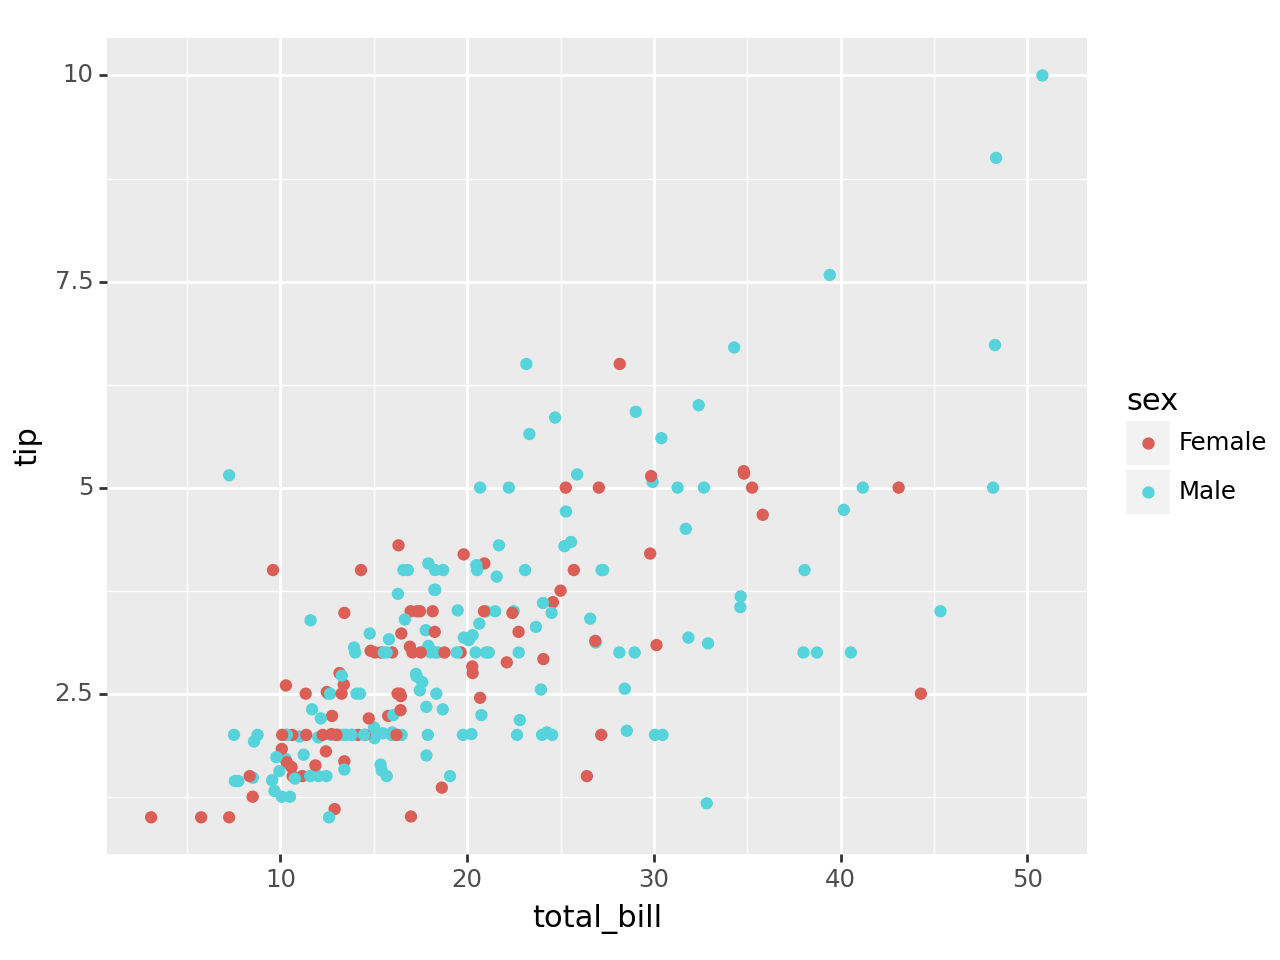

<Figure Size: (640 x 480)>

In [35]:
gg.ggplot(dat, gg.aes(x = 'total_bill', y = 'tip', color = 'sex')) + gg.geom_point()

Hmm... unfortunately looks like pretty uniform dispersion so it doesn't appear to be too information.  What if we add linear fit trendlines for each gender?

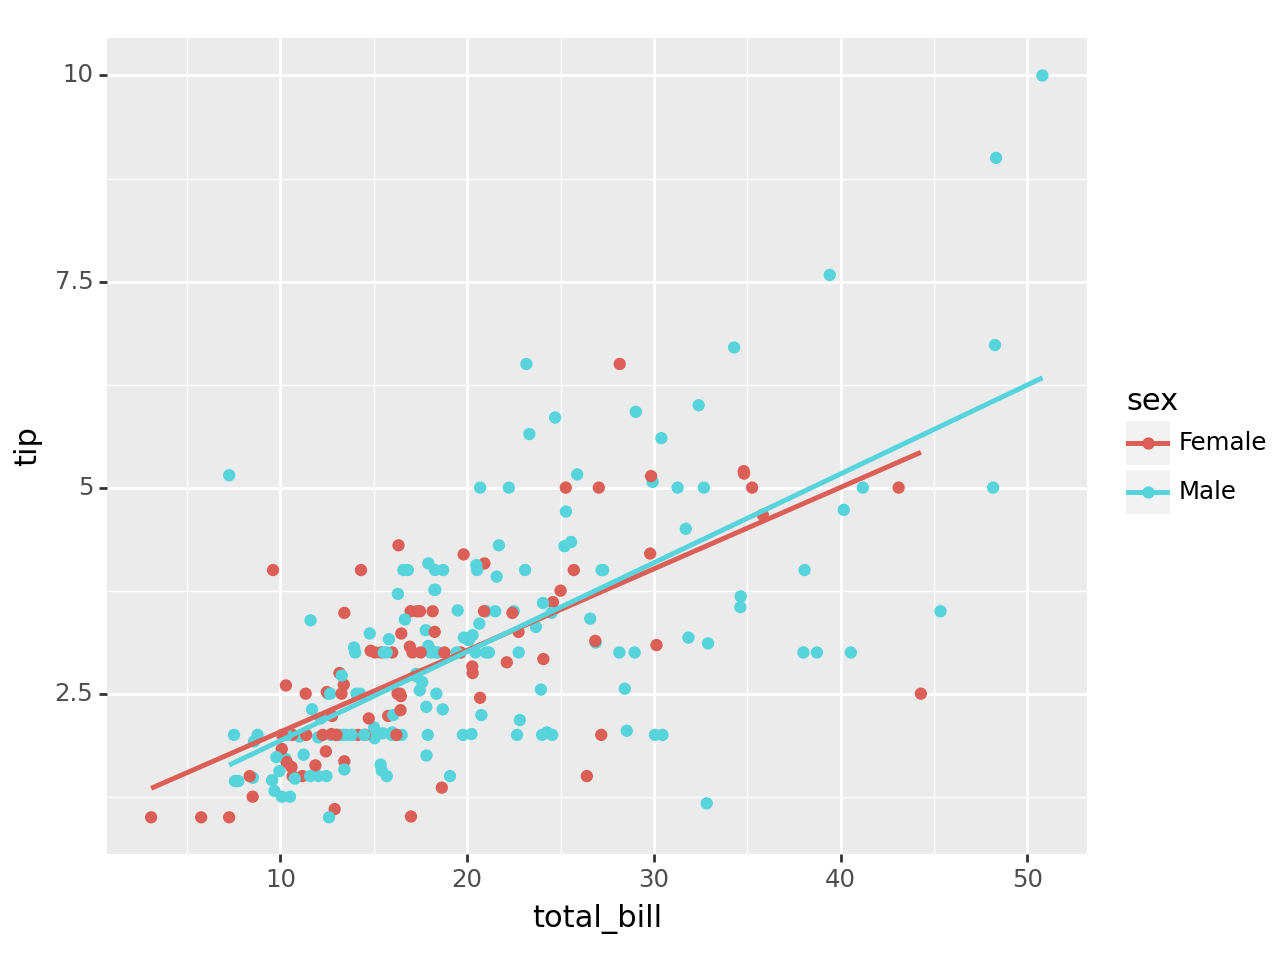

<Figure Size: (640 x 480)>

In [43]:
(gg.ggplot(dat, gg.aes(x = 'total_bill', y = 'tip', color = 'sex')) +
     gg.geom_point() +
     gg.geom_smooth(method = "lm", se = False))

As we first suspected.  Not much difference based on the sexes; however, the up sloping trendlines do confirm what we first observed in a general up trend of tipping more as the total bill increases.

Let's move on to segment, or facet, by whether or not each group was a "smoking" group or not, and also we'll use a coloring aesthetic to highlight the size of each group.

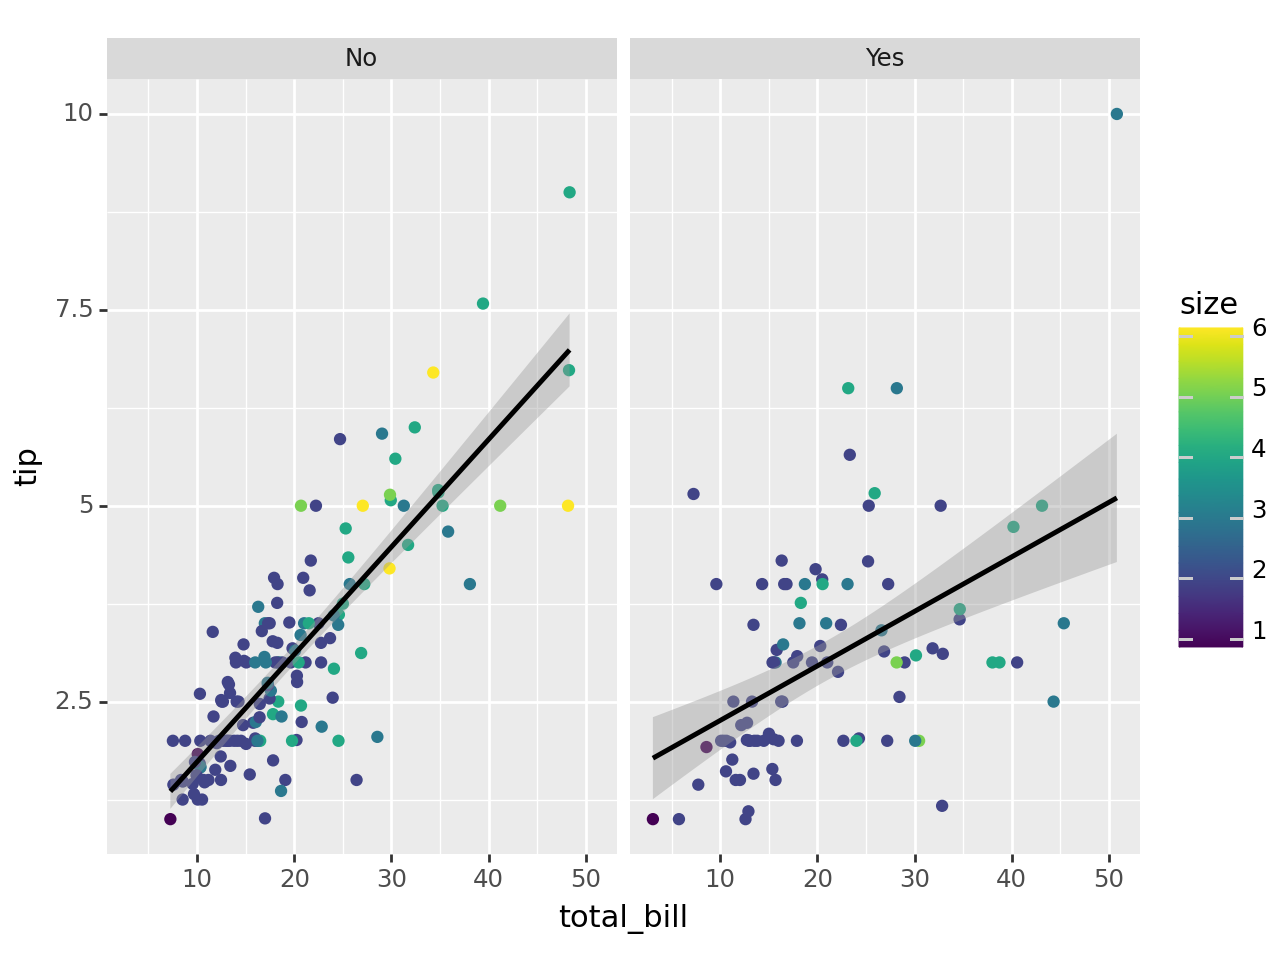

<Figure Size: (640 x 480)>

In [55]:
(gg.ggplot(dat, gg.aes(x = 'total_bill', y = 'tip', color = 'size')) +
     gg.geom_point() +
     gg.geom_smooth(method = "lm") +
     gg.facet_wrap('smoker'))

Anything jump out at you?  There's a ton of information in this one, but I'll leave it to you to pick it apart.

Ok, we can't spend all day on scatterplots, but one more just for fun.  Maybe you had the thought to create a new variable to investigate the tip as a percentage of the total bill instead of just the raw dollar amount?  If so, nicely done.  Let's try it and see what happens.

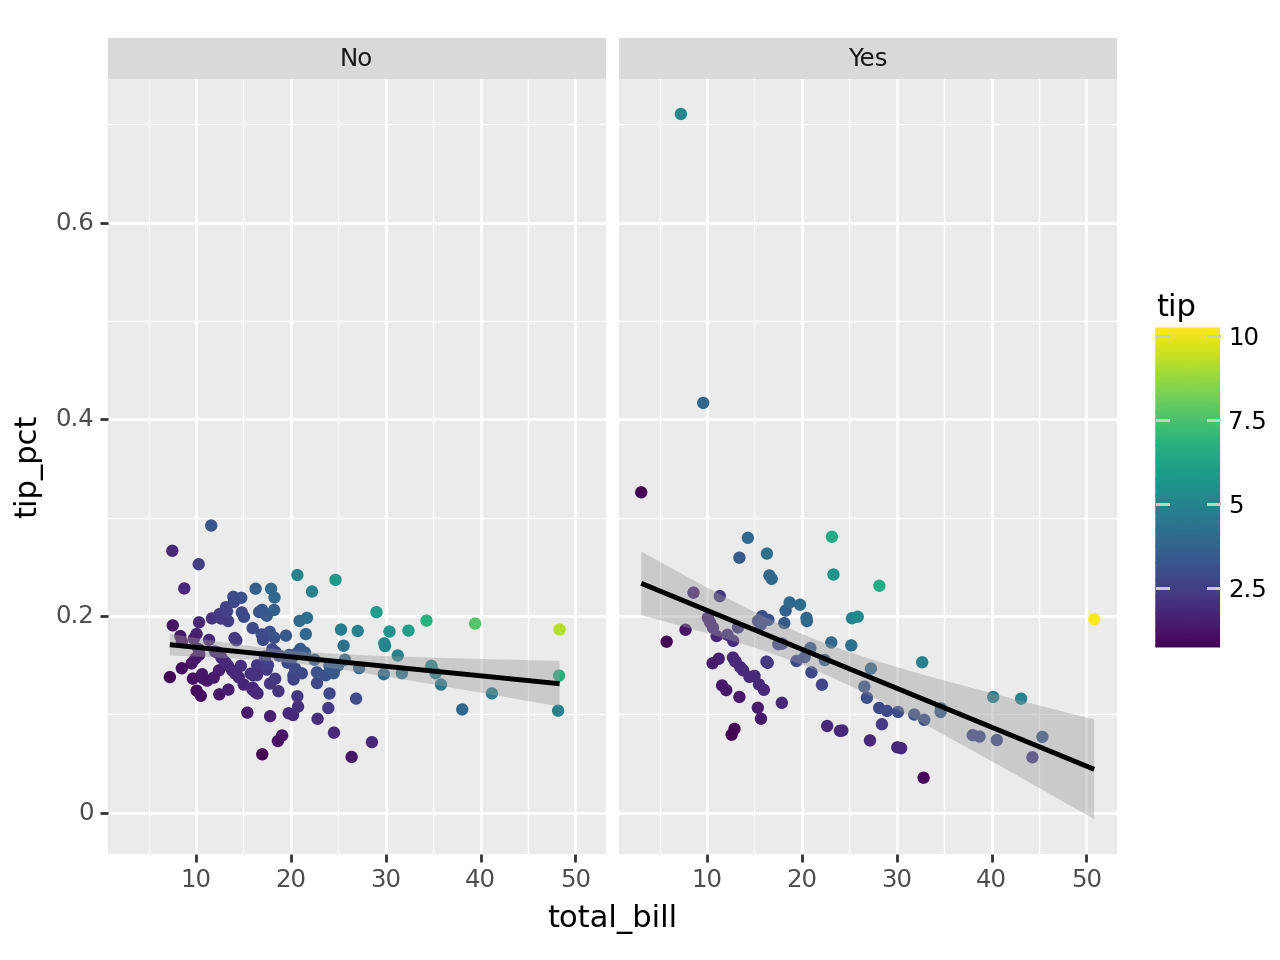

<Figure Size: (640 x 480)>

In [57]:
# Create tip % variable
dat['tip_pct'] = dat.tip / dat.total_bill

(gg.ggplot(dat, gg.aes(x = 'total_bill', y = 'tip_pct', color = 'tip')) +
     gg.geom_point() +
     gg.geom_smooth(method = "lm") +
     gg.facet_wrap('smoker'))

Whoa... the sign of the slopes flipped to negative?!?!  I thought we said as the total bill goes up, so does the tip amount???  Well that's true, it does, but as we can see the tip as a percentage of the total bill actually decreases as the bill gets larger.  So while yes it's more money, it's not keeping up on a linear scale.  Sad to see as I'm sure our waiter deserved better.

Alright we need to move to some other types.  Next up, line plots.

__<h5>Line Plots</h5>__

Line plots are pretty straightforward.  These are the stuff of _time series_ data that we discussed in our data types section.  It doesn't really make sense to connect data point by point if they're independent observations that have no dependency across time.  Let's see what I mean.

<h3>Distribution Plots</h3>

Plots that show the statistical moments of the data in a distribution, or spread, of the data can be extremely helpful in understanding the behavior of our sample under study.  We'll start with the most common and cover a few lesser used as well.

For this section we'll use the "airquality" dataset of air quality measurements from the New York State Department of Conservation and the National Weather Service from May-September 1973.


In [60]:
dat = data("airquality")
dat.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
7,23.0,299.0,8.6,65,5,7
8,19.0,99.0,13.8,59,5,8
9,8.0,19.0,20.1,61,5,9
10,NaN,194.0,8.6,69,5,10


__<h5>Histograms</h5>__

Histograms are probably the most familiar, and the most common to visualize the frequency counts of data series.  These graphs show the frequency of numerical data in the form of vertical rectangles illustrating how many times that value range was observed in the data (higher = more frequent).

Let's see what the range of values looks like in our "Temp" variable.

In [83]:
dat[['Temp']].describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,153.0,77.882353,9.46527,56.0,72.0,79.0,85.0,97.0


We can see that the average value is around 78 degrees, with the inner quartile range of 72-85.  Now let's see what this looks like plotted in a historgram.

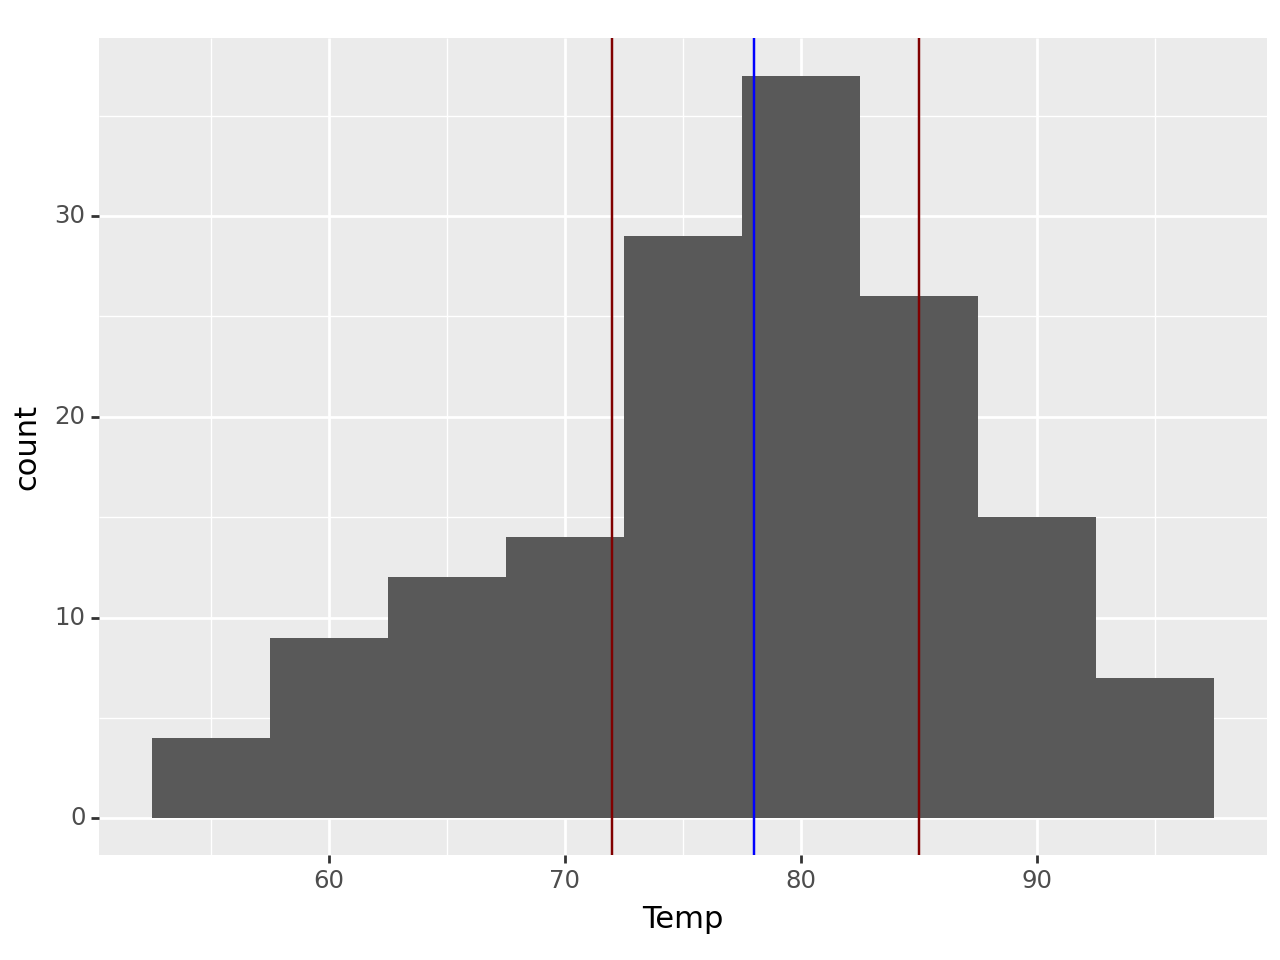

<Figure Size: (640 x 480)>

In [144]:
(gg.ggplot(dat, gg.aes('Temp')) +
     gg.geom_histogram(binwidth = 5) +
     gg.geom_vline(xintercept = 78, color = "blue") +
     gg.geom_vline(xintercept = [72,85], color = "maroon"))

Nice!  That's pretty much exactly what we see.  It's a little hard to see that distribution because of the "coarseness" due to the number of chosen bins.  Histograms have a parameter called "bins" that you can adjust to increase or decrease the width of the discrete ranges on the x-axis.  Let's try making it a little more spread out.

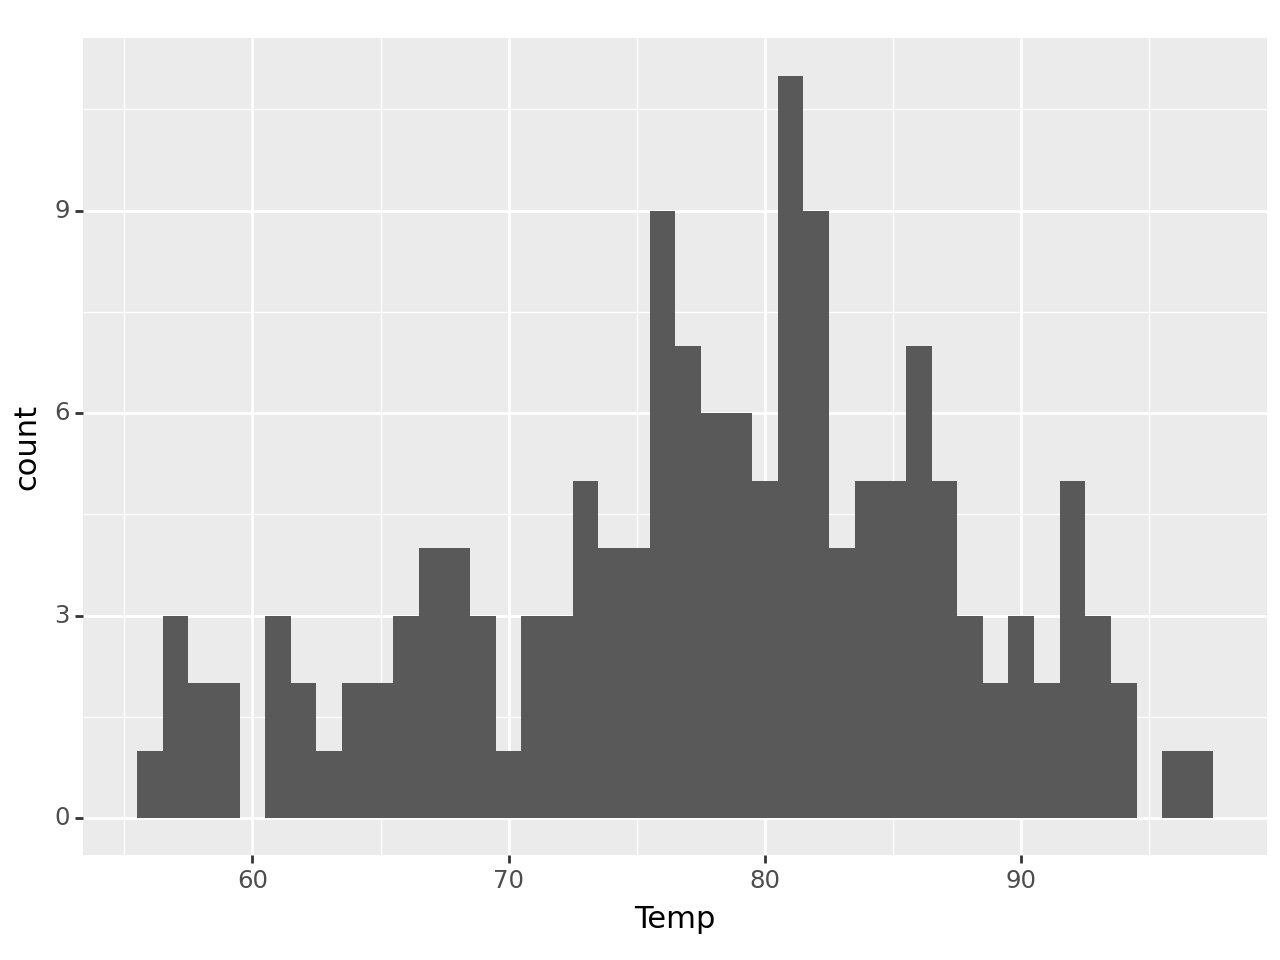

<Figure Size: (640 x 480)>

In [90]:
(gg.ggplot(dat, gg.aes('Temp')) +
     gg.geom_histogram(binwidth = 1))

Interesting.  See how we lost all of the aggregated groupings?  Historgrams are particular in the number of bins required to really see what's going on.  When you start wanting to see this kind of granularity, maybe you want the next kind of plot we'll look at call Density Plots.

__<h5>Density Plots</h5>__

If the aggregated coarseness of the historgram was too much for you, maybe you're looking for a smoothed version that will nicely show the overall distribution of data.  Enter the density plot.  Here we lose the frequency counts in favor of the probability density funciton of a variable.  Sounds complicated, however the same idea applies as with the histogram where the larger more peaked areas occur more frequently.  Simple as that.

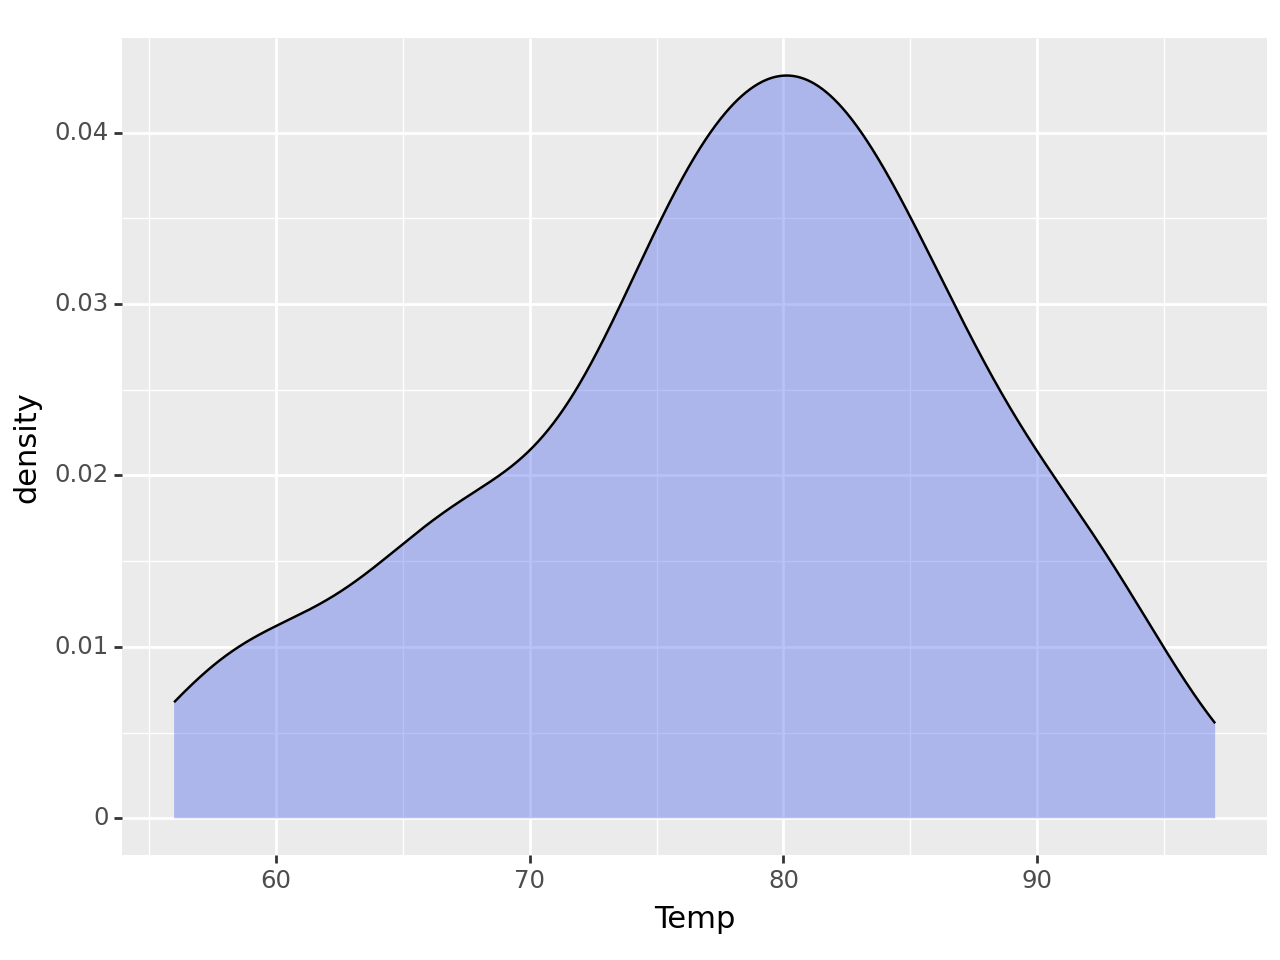

<Figure Size: (640 x 480)>

In [132]:
(gg.ggplot(dat) +
     gg.geom_density(gg.aes('Temp'), fill = "#4E68EC", alpha = .4))

Let's overlay our density curve on top of our histogram and see how they compliment each other.

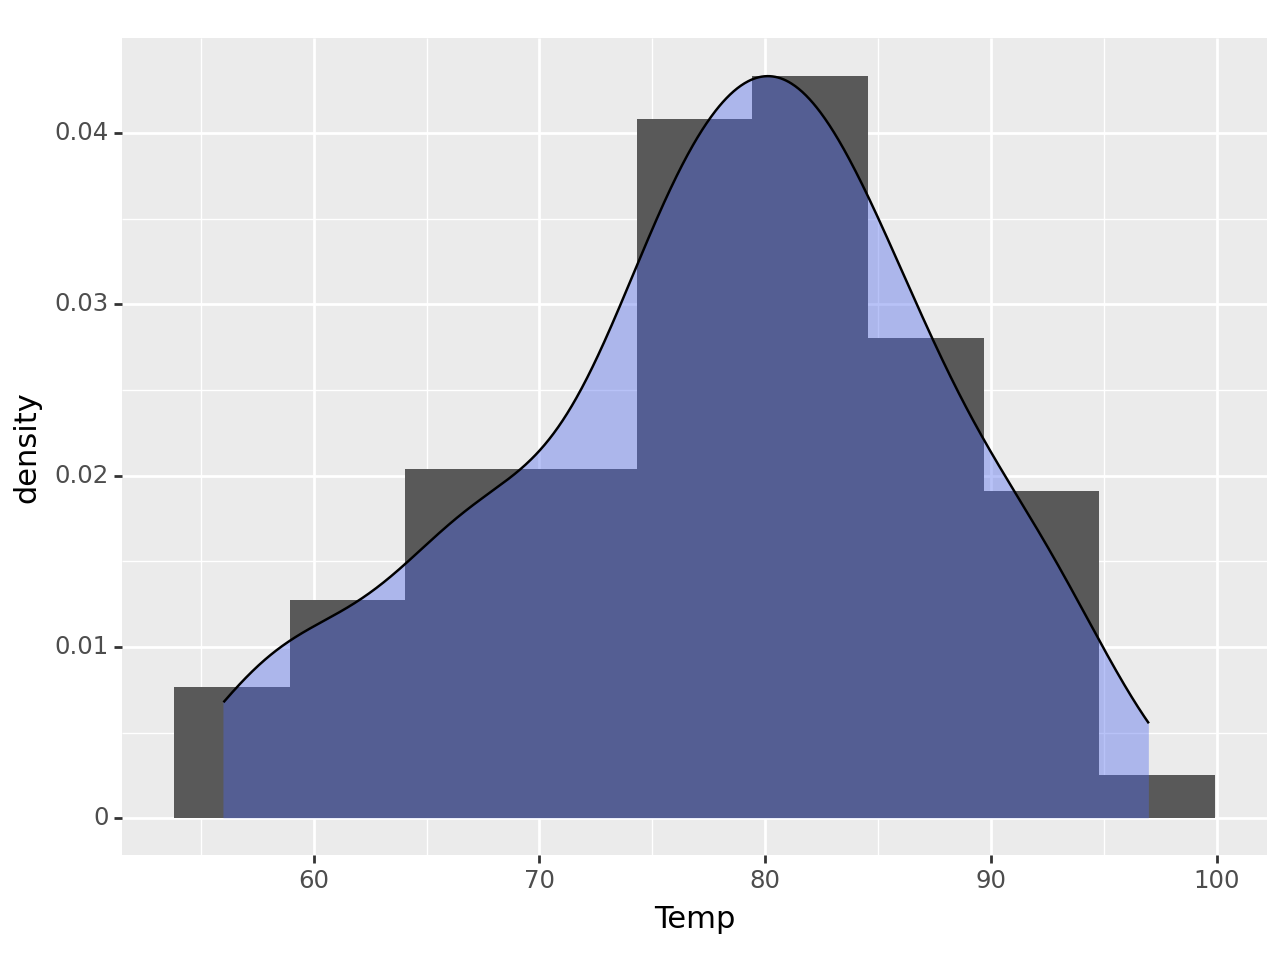

<Figure Size: (640 x 480)>

In [130]:
(gg.ggplot(dat, gg.aes(x = "Temp", y = gg.after_stat("density"))) +
     gg.geom_histogram() +
     gg.geom_density(fill = "#4E68EC", alpha = .4) +
     gg.scale_fill_discrete(guide = False))

Very nice.  Sometimes you don't need or want to see the frequency steps and jagged jumps, and would prefer to see the smooth curve.  Now, let's take one last look by putting all of our numeric variables on the same graph plotting all of their individual density curves.  

D:\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 44 rows containing non-finite values.


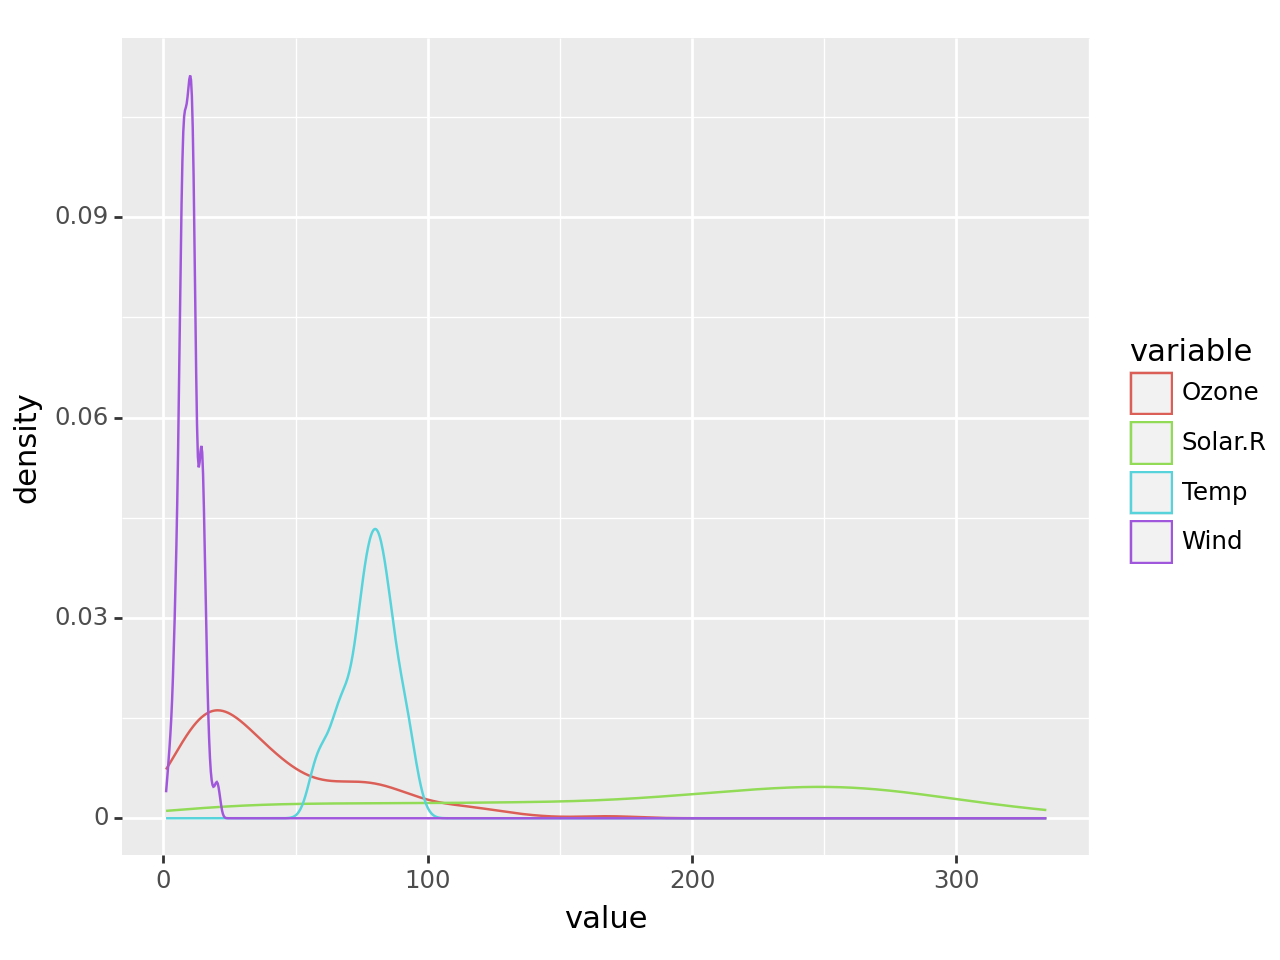

<Figure Size: (640 x 480)>

In [128]:
import pandas as pd
melted_dat = pd.melt(dat, id_vars = ['Day','Month'])

(gg.ggplot(melted_dat, gg.aes(x = 'value', color = 'variable')) +
     gg.geom_density())

These can get a little crowded if you try to plot too many features all at once, but at least here you can see that we have very different shapes of distributions.  To be fair, it's a little misleading because all of these variables are on different scales and units of measurements, so take these readings with a grain of salt.  Normally you'd want to compare apples to apples on the same scale (e.g. only comparing temperature measured in degrees on the same plot).

__<h5>Empirical Cummulative Density Function</h5>__

In [202]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

flips = np.random.choice([1,-1], size = 100, p = [.6, .4])
flips = np.cumsum(flips)

ecdf = ECDF(flips)
ecdf_plt = pd.DataFrame({'x': ecdf.x,
                         'y': ecdf.y})

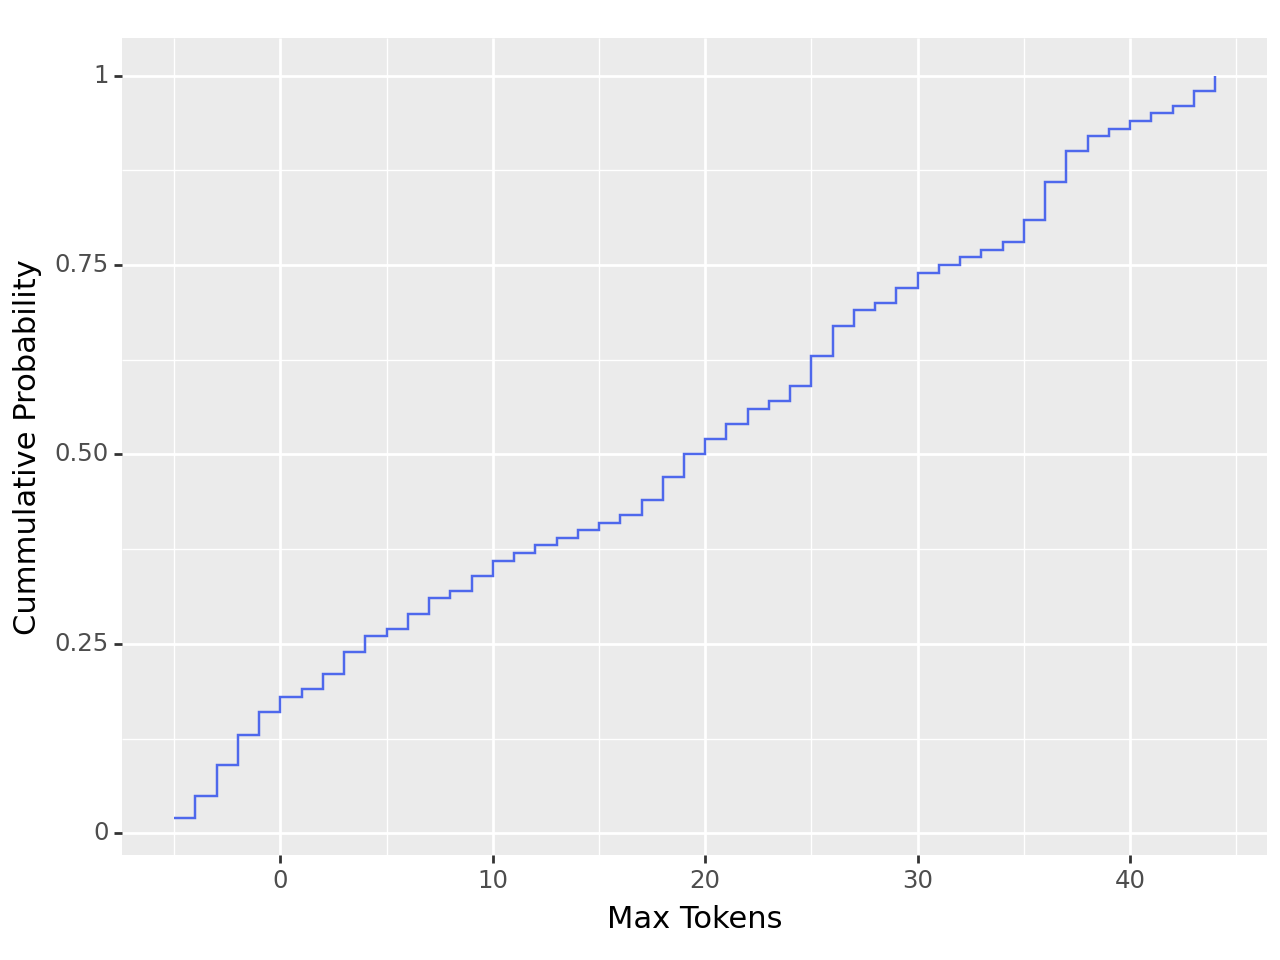

<Figure Size: (640 x 480)>

In [204]:
# Plot CDF
(gg.ggplot(ecdf_plt, gg.aes(x = 'x', y = 'y')) +
     gg.stat_ecdf(color = "#4E68EC") +
     gg.labs(x = "Max Tokens", y = "Cummulative Probability"))

You quickly come to learn that there's only so many dimensions we can force into a graph, and just because we can doesn't mean we should.  Remember, _simple is always better_.  In most cases, our plots are only going to be bi-variate (only two variables), with possibly one or two more aesthetic layers like size, shape, or color added in.

In [ ]:
#sns.pairplot(dat.iloc[:,1:], hue = 'gender')